In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, RandomForestRegressor
from sklearn.linear_model import RidgeCV, LassoCV
from pytube import YouTube
import os
from pathlib import Path

In [2]:
with open("C:\\Users\Zeyad Tarek\\Documents\\assignment 2 da\\dataset\\train_split_0.pkl", 'rb') as f:
    data = pickle.load(f)


pd.DataFrame(data).to_csv(f"C:\\Users\Zeyad Tarek\\Documents\\assignment 2 da\\dataset\\train_data.csv",index=False)

tarin_df = pd.read_csv('C:\\Users\Zeyad Tarek\\Documents\\assignment 2 da\\dataset\\train_data.csv')

In [3]:
with open("C:\\Users\Zeyad Tarek\\Documents\\assignment 2 da\\dataset\\test_split_0.pkl", 'rb') as f:
    data = pickle.load(f)

pd.DataFrame(data).to_csv(f"C:\\Users\Zeyad Tarek\\Documents\\assignment 2 da\\dataset\\test_data.csv",index=False)

test_df = pd.read_csv('C:\\Users\Zeyad Tarek\\Documents\\assignment 2 da\\dataset\\test_data.csv')

In [4]:
with open("C:\\Users\Zeyad Tarek\\Documents\\assignment 2 da\\dataset\\final_captions_dict.pkl", 'rb') as f:
    data = pickle.load(f)

final_captions_df = pd.DataFrame().from_dict(data, orient='index')
final_captions_df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,475,476,477,478,479,480,481,482,483,484
"(1, 1)",<sos>,and,a,half,somersault,over,the,three,point,two,...,None,None,None,None,None,None,None,None,None,None
"(1, 2)",<sos>,just,managed,to,fold,it,in,underneath,the,water,...,None,None,None,None,None,None,None,None,None,None
"(1, 3)",<sos>,we,just,rolled,that,one,over,with,his,feet,...,None,None,None,None,None,None,None,None,None,None
"(1, 4)",<sos>,popular,starting,dive,and,it,gives,you,a,chance,...,None,None,None,None,None,None,None,None,None,None
"(1, 5)",<sos>,maybe,just,slightly,under,rotating,as,he,hit,the,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(1, 96)",<sos>,four,and,a,half,somersault,well,this,is,his,...,None,None,None,None,None,None,None,None,None,None
"(1, 97)",<sos>,bronze,medalist,lovely,dive,to,start,the,fourth,and,...,None,None,None,None,None,None,None,None,None,None
"(1, 98)",<sos>,four,and,a,half,somersault,speed,of,that,well,...,None,None,None,None,None,None,None,None,None,None
"(1, 99)",<sos>,a,shout,inward,three,and,a,half,somersault,that,...,None,None,None,None,None,None,None,None,None,None


In [5]:
with open("C:\\Users\Zeyad Tarek\\Documents\\assignment 2 da\\dataset\\final_annotations_dict.pkl", 'rb') as f:
    data = pickle.load(f)


pd.DataFrame(data).to_csv(f"C:\\Users\Zeyad Tarek\\Documents\\assignment 2 da\\dataset\\final_annotations_df.csv")


final_annotations_df = pd.read_csv('C:\\Users\Zeyad Tarek\\Documents\\assignment 2 da\\dataset\\final_annotations_df.csv', header=None).T

final_annotations_df.drop(final_annotations_df.columns[1], axis=1, inplace=True)
final_annotations_df.fillna('video_number',inplace= True)
headers = list(final_annotations_df.iloc[0,:])
final_annotations_df = final_annotations_df.iloc[1:,:]

final_annotations_df.to_csv('C:\\Users\Zeyad Tarek\\Documents\\assignment 2 da\\dataset\\final_annotations_df.csv', index=False,header=headers)
final_annotations_df = pd.read_csv('C:\\Users\Zeyad Tarek\\Documents\\assignment 2 da\\dataset\\final_annotations_df.csv')

final_annotations_df

,video_number,primary_view,start_frame,end_frame,position,difficulty,armstand,rotation_type,ss_no,tw_no,final_score
0,1.0,0.0,7377.0,7462.0,2.0,3.2,0.0,2.0,7.0,0.0,88.0
1,1.0,0.0,8649.0,8738.0,2.0,3.2,0.0,2.0,7.0,0.0,86.4
2,1.0,0.0,10036.0,10124.0,1.0,3.2,0.0,0.0,5.0,3.0,75.2
3,1.0,0.0,11444.0,11540.0,2.0,3.2,0.0,2.0,7.0,0.0,72.0
4,1.0,0.0,12860.0,12969.0,1.0,3.2,0.0,0.0,5.0,3.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...
1407,26.0,0.0,265138.0,265228.0,2.0,3.2,0.0,2.0,7.0,0.0,78.4
1408,26.0,0.0,266612.0,266688.0,1.0,3.2,0.0,0.0,5.0,3.0,70.4
1409,26.0,0.0,268270.0,268358.0,1.0,3.2,0.0,0.0,5.0,3.0,68.8
1410,26.0,0.0,269848.0,269950.0,1.0,3.6,0.0,0.0,5.0,5.0,72.0


### Task 1: Form a semi-supervised AQA task from this data, describe how you would design the experiment setup for evaluating a semi-supervised learning approach on your proposed task, provide a valid solution (e.g., model architecture) for your experiment setup.

My main goal here is to predict the values of Factorized Action Recognition and Action Quality Score which they are represented in final_annotations_dict.pkl so it will be MTL-AQA task.

1. Read each video frames and store each video frames in a separate list.

2. delete 60% of the rows from final_annotations_dict.pkl becuase they are considering as the labels.

3. Read which actions frames from the whole video frames based on first frame index and last frame index and their values in start_frame and end_frame features in final_annotations_dict.pkl and store each action for each video in a separate list.
4. For each video, we divide it into T segments.

5. Then we will use 3 modules the first one is **action assessment module** to learn the representations of labeled videos and the second module is **a masked segment feature recovery module** to learn representations of unlabeled videos and the third module is **distribution alignment module** to align the feature distributions of the labeled and the unlabeled data.

    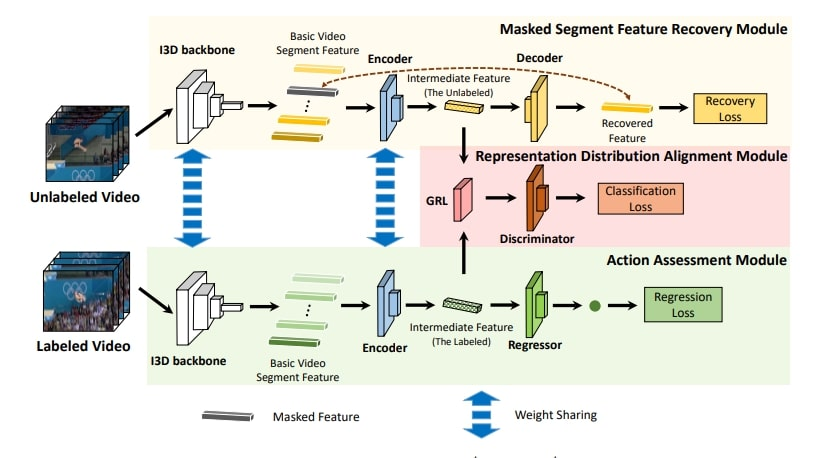

    1. Learning Action Assessment on the Labeled Videos using **action assessment module**
    
        1. we are obtaining basic features of the videos using **ID3**
        2. We first use an encoder E(·) to obtain the intermediate feature (**f<sup>l</sup>)**.
        3. After obtaining the intermediate representations, we predict an action performance score for the labeled samples, which is written as $\hat{y}$<sup>l</sup> = R(f<sup>l</sup>), l = 1,2, ..., L,
        4. To perform supervised assessment training on the labeled samples, we employ the **Mean-Squared Error (MSE) loss**.
        
    
    2. Learning Temporal Dependencies on the Unlabeled Videos using **a masked segment feature recovery module**.

        1. like first step in **action assessment module** we are obtaining basic features of the videos using **ID3**
        2. we randomly select k-th basic segment feature v<sup>u</sup><sub>k</sub> (our unlabeled video) (1 ≤ k ≤ T) to mask and form V¨<sup>u</sup> . Then, we feed the masked basic feature to our encoder to obtain an intermediate feature, f<sup>u</sup> = E(V¨<sup>u</sup>) **unlabeled video in our encoder**, u = 1, 2, ..., U
        3. After that, we try to recover the masked segment feature v<sup>u</sup><sub>k</sub> from the intermediate feature ¨f<sup>u</sup> with a feature decoder Φ(·).
        4. Mean-Absolute-Error (MAE) loss is employed to perform our self-supervised feature recovery learning. $ 1/U \sum \limits _{u=1} ^{U} Φ( ¨fu) − vuk| $, where U is the number of unlabeled samples. ¨f<sup>u</sup> represents the intermediate representation obtained from a masked video. Φ(·) is the decoder for feature recovery.

        
    3.  Aligning the Representation Distributions **distribution alignment module**.

        1. use adversarial training network to align the intermediate representation distributions between the labeled and the unlabeled data.
        2. denote the intermediate features of the labeled samples as class **1**, and that of the unlabeled samples as class **0**.
        3. We introduce a discriminator D(·) to distinguish the feature domain while our encoder tries to confuse the discriminator, Our discriminator module is implemented as a binary classifier.
        4. implement an optimization by a gradient reverse layer (GRL) which can automatically reverse the gradient between the discriminator and the encoder to enable joint training of all modules, instead of optimizing the encoder and the discriminator iterativel.
        5. apply coss-entropy function as adversarial loss so by optimizing the cross-entropy loss function, the discriminator attempts to predict 1 for a labeled sample and 0 for an unlabeled sample.

        
6. start predicting the labels of labeled dataset and unlabled dataset on  MTL-AQA dataset.
7. , we'll use Spearman’s Rank Correlation (Sp.Corr) to evaluate the ranking correlation between the ground-truth scores and the predictions. Considering the fact that different referees may give a little different scores for a specific action performance

## Task 3

### Task 3 part 1

he formalized AQA as a regression problem where, generally,he want to the Euclidean distance between the predicted quality score and the ground truth is used as the objective function to be minmized. and he found that using L1 distance in addition to L2 yielded better results on the AQA task $ 1/N \sum \limits _{i=1} ^{N}$(x<sub>i</sub> − y<sub>i</sub>)<sup>2</sup> + |x<sub>i</sub> − y<sub>i</sub>|, where x<sub>i</sub> is the predicted score and y<sub>i</sub> is the ground truth score for each of the N samples. For action recognition, also he use cross-entropy loss between the predicted labels and ground truth label, and **negative log likelihood** is used as the loss function for the **captioning task**.

And the main task here is to classify.
1.	Fine-grained action recognition
2.	Estimating the AQA score.

And generate comments for unlabled videos.


He used two approached the first one is  **C3D-AVG-MTL** and the second one is ** **Multiscale Context Aggregation with Dilated Convolutions (MSCADC)**.

1. Read each video frames and store each video frames in a separate list.
2. delete 60% of the rows from final_annotations_dict.pkl becuase they are considering as the labels.

3. Read which actions frames from the whole video frames based on first frame index and last frame index and their values in start_frame and end_frame features in final_annotations_dict.pkl and store each action for each video in a separate list.
4. normalized each action frames into divided 96 frames for **C3D-AVG-MTL** module and 16 frames for **(MSCADC)**</br></br>.


### **C3D-AVG-MTL** approach.

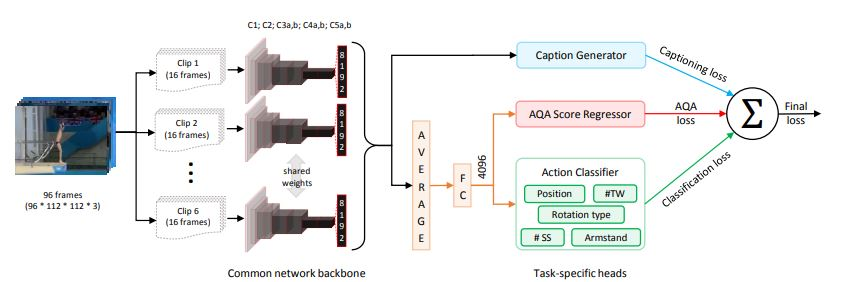

This action recongention task require action sequence needs to be considered because the athlete can make or lose points at any point during the whole sequence.

5. Build a **C3D-AVG-MTL** model to extract spatial-temporal features and salient motion patterns and then and then aggregate clip-level representations
to obtain video-level description.
    1. Backbone consists of C3D network up to the fifth pooling layer.
    2. encodes input video-clips using C3D-AVG network up to Average layer, which  into representations that when averaged (in feature space) would correspond to the total AQA points gathered by the athlet,  use averaging as the linear combination. The network is optimized end-to-end for all three tasks.
    3. averaged clip-level pool-5 features clip-level pool-5 features to yield a video-level representation, and input the individual clip-level features to the captioning branch before averaging.

6. traine the model end-to-end with a 112 × 112 center crop from the 171 × 128 pixel input video. Each dive sample was temporally normalized to a length of 96 frames.



### **Multiscale Context Aggregation with Dilated Convolutions (MSCADC)** approach.

5. Build The **MSCADC** to extract spatial-temporal features.

    1. Backbone network is based on **C3D** network.
    2.  use separate heads, one for each task. Heads consist of a context net followed by a few addtional layers. The context net is where the feature maps are aggregated at multiple scales.

6. train network on resized 640 × 360 Frames. and 180 × 180 center cropping,  all videos are downsampled to 16 frames.

notes: **MSCADC** incorporates improvements like using Batch Normalization to provide better regularization which is needed in AQA, pooling is removed from the last two convolutional groups of C3D and instead a dilation rate of 2 is used.

Last step: evalute performance using  Spearman’s .rank correlation,

### Task 3 part 2

Yes, I think we could classify The entry into the water, whether it is a head-first or feet-first entry because judges takes that seriously, also we could classify diving facial expressions from the take-off and when he hit the water edge.

### Task 3 part 3

Another applications that can benefit from their multi-task learning approach.

1. Detect what kind of sport is played based on the players actions among and the labels are types of sports and another output to be predicted is whether the player played well or not.
2. self driving cars to detect multiple objects at the same time over the road.
3. evaluate actions and assign score for a champion based on her action with the help of **Rhythmic Gymnastics dataset**.